In [ ]:
import json
import xarray as xr
import rioxarray
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib import pyplot as plt
from pathlib import Path

In [ ]:
from fiweps.util import coordutil as co

In [ ]:
configdir = Path("../config/dscale/")

with open(configdir / "domains_03_extent.json") as src:
    extent = json.load(src)
extent

{'d01': {'west': 161, 'east': -108, 'north': 76, 'south': 50},
 'd02': {'west': -178, 'east': -128, 'north': 72, 'south': 55}}

In [ ]:
co.deg180_360(extent['d01']['east'])

252

In [ ]:
datadir = Path("/Volumes/CWMobileSSD/Climate/JRA55/snow")
january_JRA55 = datadir / "anl_land.065_snwe.reg_tl319.2021010100_2021013118"
april_JRA55 = datadir / "anl_land.065_snwe.reg_tl319.2021040100_2021043018"
june_JRA55 = datadir / "anl_land.065_snwe.reg_tl319.2021060100_2021063018"
datadir = Path("/Volumes/CWMobileSSD/Climate/ERA5/sd_grib")
january_ERA5 = datadir / "e5.oper.an.sfc.128_141_sd.ll025sc.2021010100_2021013123.grb"
april_ERA5 = datadir / "e5.oper.an.sfc.128_141_sd.ll025sc.2021040100_2021043023.grb"
june_ERA5 = datadir / "e5.oper.an.sfc.128_141_sd.ll025sc.2021060100_2021063023.grb"
datadirNC = Path("/Volumes/CWMobileSSD/Climate/ERA5/sd_netcdf/")

## make glacier mask

In [ ]:
ds = xr.open_dataset(datadirNC / "reanalysis-era5-single-levels_sd_2021_07.nc")
july_sd_era5 = ds.sd.mean(dim="time")
july_sd_era5.where(july_sd_era5 > 0.1)

<xarray.DataArray 'sd' (latitude: 721, longitude: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

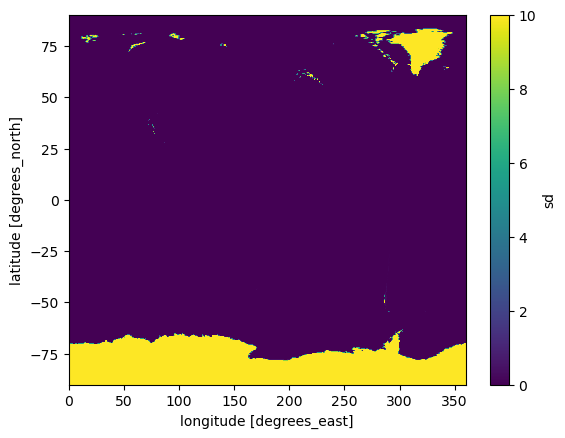

In [ ]:
july_sd_era5.plot()

In [ ]:
template_data = np.ones((len(ds.latitude), len(ds.longitude)))
template_lats = ds.latitude
template_lons = ds.longitude
templateDS = xr.DataArray(template_data, 
    coords=[template_lats, template_lons], 
    dims=["latitude", "longitude"])
templateDS

<xarray.DataArray (latitude: 721, longitude: 1440)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

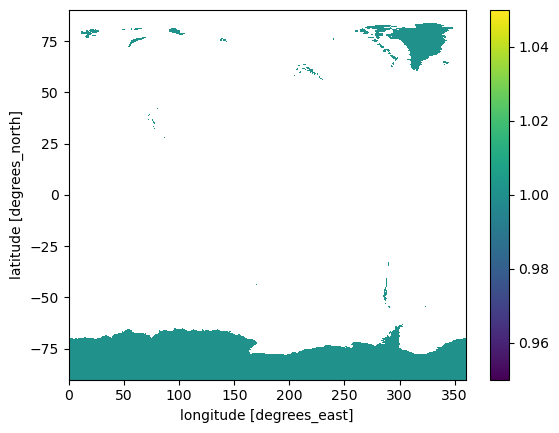

In [ ]:
templateDS = templateDS.where(july_sd_era5 > 0.1, 0)
templateDS.where(templateDS==1).plot()

In [ ]:
templateDS

<xarray.DataArray (longitude: 1440, latitude: 721)>
array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

In [ ]:
maskoutdir = Path("/Volumes/CWMobileSSD/Climate/ERA5/masks/")

In [ ]:
ds_ERA = xr.open_dataset(datadirNC / "reanalysis-era5-single-levels_sd_2021_07.nc")


In [ ]:
ds_ERA.sd.isel(time=0)

<xarray.DataArray 'sd' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 2021-07-01
Attributes:
    units:          m of water equivalent
    long_name:      Snow depth
    standard_name:  lwe_thickness_of_surface_snow_amount

In [ ]:
ds = xr.open_dataset(june_JRA55, engine="cfgrib")
ds.sd.isel(time=0)

<xarray.DataArray 'sd' (latitude: 320, longitude: 640)>
[204800 values with dtype=float32]
Coordinates:
    time        datetime64[ns] 2021-06-01
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 89.57 89.01 88.45 ... -88.45 -89.01 -89.57
  * longitude   (longitude) float64 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
    valid_time  datetime64[ns] ...
Attributes: (12/24)
    GRIB_paramId:                             228141
    GRIB_numberOfPoints:                      204800
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_gg
    ...                                       ...
    GRIB_name:                                Snow depth water equivalent
    GRIB_shortName:                           sd
    GRIB_units:                               kg m**-2
    long_name:                                Snow depth water equivalent
    units:                                    kg m**-2
    standard_name:                            unknown

In [ ]:
ds.sd

<xarray.DataArray 'sd' (time: 120, latitude: 320, longitude: 640)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [17.364502, 17.364502, ..., 17.51709 , 17.456055],
        [18.218994, 18.218994, ..., 18.28003 , 18.249512]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [17.39502 , 17.39502 , ..., 17.547607, 17.486572],
        [18.249512, 18.249512, ..., 18.310547, 18.28003 ]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [17.51709 , 17.51709 , ..., 17.51709 , 17.51709 ],
        [17.822266, 17.822266, ..., 17.822266, 17.822266]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [17.608643, 17.608643, ..., 17.608643, 17.608643],
        [17.913818, 17.913818, ..., 17.913818, 17.913818]]], dtype=float32)
Coordinates:
  * time        (time) datetime64[ns] 2021-06-01 ... 2021-06-30T18:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 89.57 89.01 88.45 ... -88.45 -89.01 -89.57
  * longitude   (longitude) float64 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
    valid_time  (time) datetime64[ns] ...
Attributes: (12/24)
    GRIB_paramId:                             228141
    GRIB_numberOfPoints:                      204800
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_gg
    ...                                       ...
    GRIB_name:                                Snow depth water equivalent
    GRIB_shortName:                           sd
    GRIB_units:                               kg m**-2
    long_name:                                Snow depth water equivalent
    units:                                    kg m**-2
    standard_name:                            unknown

In [ ]:
ds_ERA.sd.shape

(744, 721, 1440)

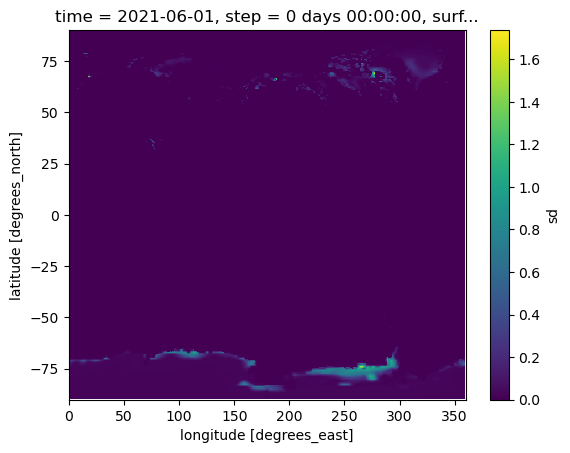

In [ ]:
ds_JRA_ERA = ds.fillna(0).interp(
    latitude=ds_ERA.latitude, longitude=ds_ERA.longitude, method='nearest') / 1000
ds_JRA_ERA.sd.isel(time=0).plot()

In [ ]:
combined_DS = ds_ERA.sd.where(templateDS==0).isel(time=0).combine_first(ds_JRA_ERA.isel(time=0))
combined_DS.sd.max()

<xarray.DataArray 'sd' ()>
array(1.5579224, dtype=float32)
Coordinates:
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    valid_time  datetime64[ns] 2021-06-01

/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encou

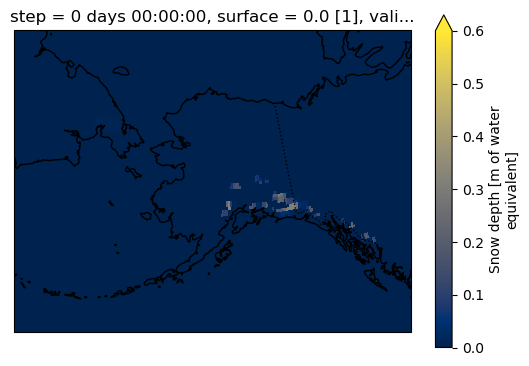

In [ ]:
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)
ax.set_extent([-180, -130, 48, 75])
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')
combined_DS.sd.plot(
    cmap=plt.cm.cividis, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=0.6
)

/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encou

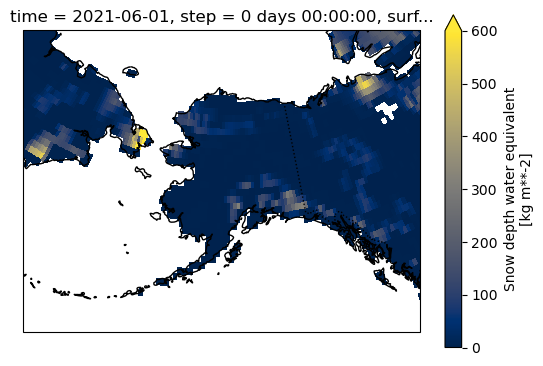

In [ ]:
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)
ax.set_extent([-180, -130, 48, 75])
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')
ds.sd.isel(time=0).plot(
    cmap=plt.cm.cividis, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=600
)

/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encou

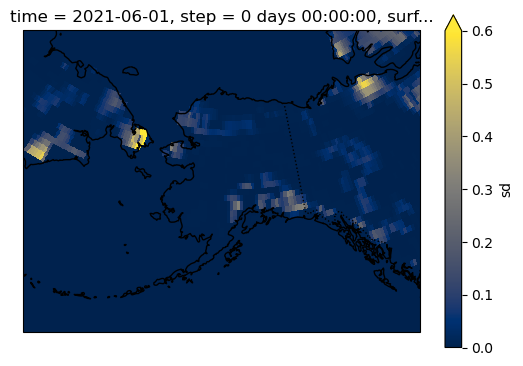

In [ ]:
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)
ax.set_extent([-180, -130, 48, 75])
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')
ds_JRA_ERA.sd.isel(time=0).plot(
    cmap=plt.cm.cividis, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=0.6
)

/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encou

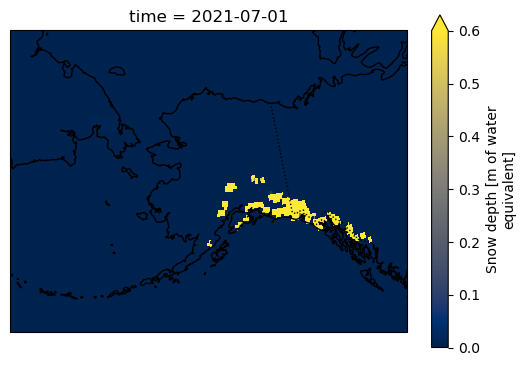

In [ ]:
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)
ax.set_extent([-180, -130, 48, 75])
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')
ds_ERA.sd.isel(time=0).plot(
    cmap=plt.cm.cividis, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=0.6
)

Can't read index file '/Volumes/CWMobileSSD/Climate/ERA5/sd_grib/e5.oper.an.sfc.128_141_sd.ll025sc.2021040100_2021043023.grb.923a8.idx'
Traceback (most recent call last):
  File "/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/cfgrib/messages.py", line 547, in from_indexpath_or_filestream
    self = cls.from_indexpath(indexpath)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/cfgrib/messages.py", line 429, in from_indexpath
    index = pickle.load(file)
            ^^^^^^^^^^^^^^^^^
EOFError: Ran out of input
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/li

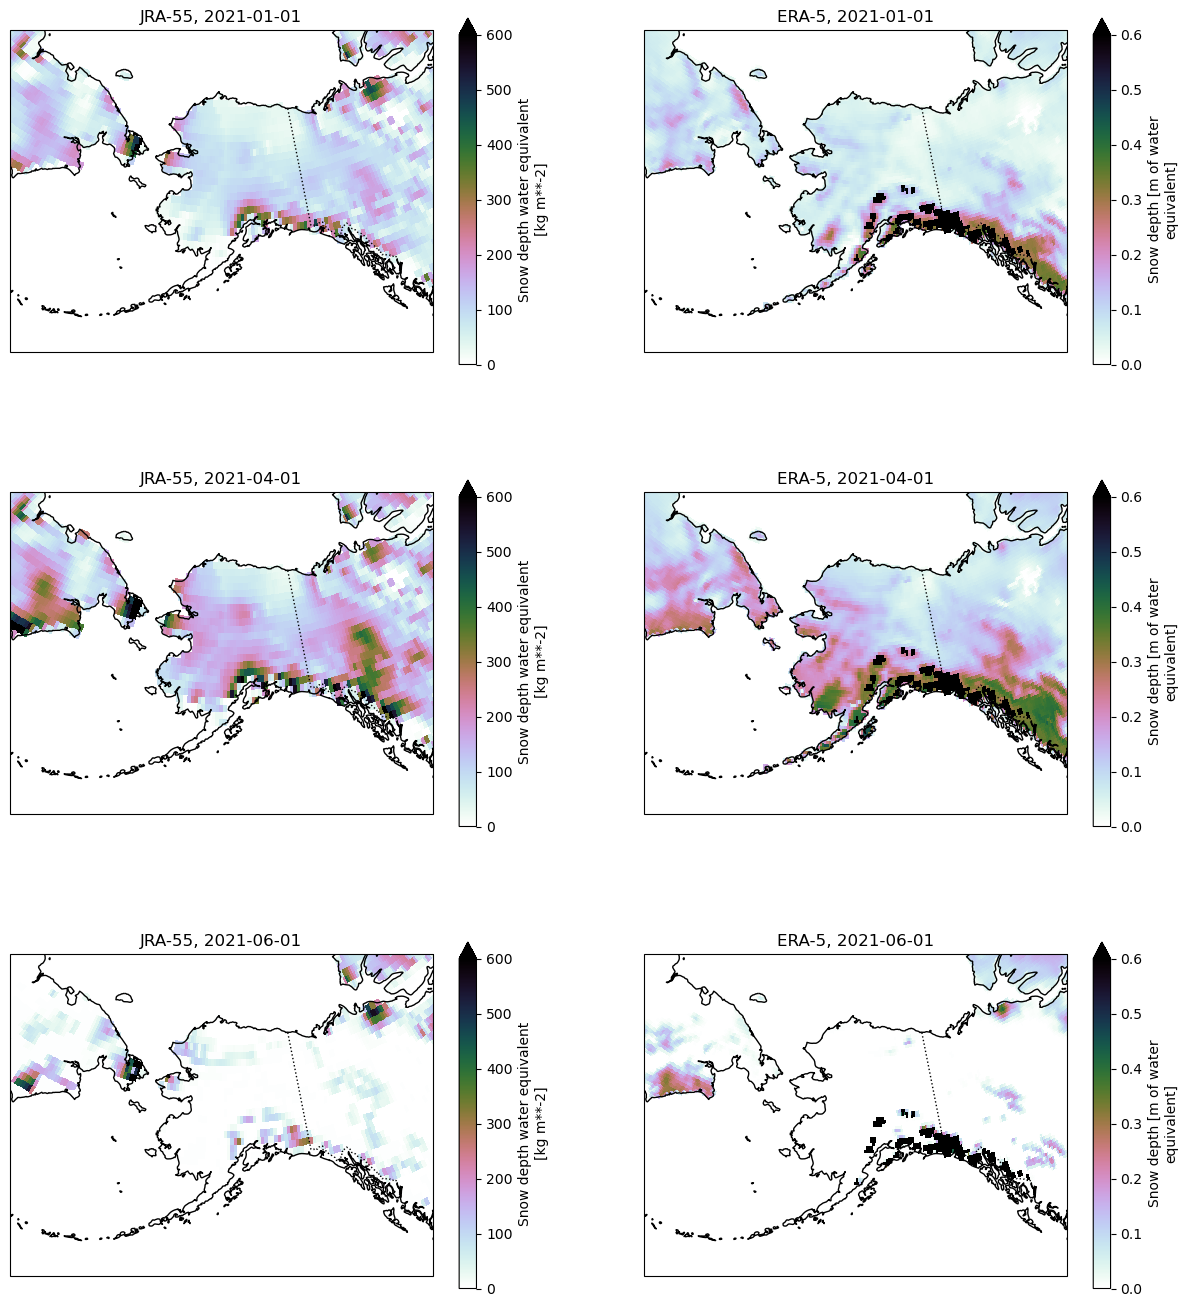

In [ ]:
fig, axs = plt.subplots(nrows=3,ncols=2,
                        subplot_kw={'projection': projection},
                        figsize=(15,17))
for ax in axs.flatten():
    ax.set_extent([-180, -130, 48, 75])
    ax.coastlines()
    ax.add_feature(cf.BORDERS, linestyle=':')
with xr.open_dataset(january_JRA55, engine="cfgrib") as ds:
    ds.sd.isel(time=0).plot(
        cmap=plt.cm.cubehelix_r, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[0][0],
        vmax=600
    )
    axs[0][0].set_title(f"JRA-55, {ds.time[0].dt.strftime('%Y-%m-%d').data}")
with xr.open_dataset(april_JRA55, engine="cfgrib") as ds:
    ds.sd.isel(time=0).plot(
        cmap=plt.cm.cubehelix_r, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[1][0],
        vmax=600
    )
    axs[1][0].set_title(f"JRA-55, {ds.time[0].dt.strftime('%Y-%m-%d').data}")
with xr.open_dataset(june_JRA55, engine="cfgrib") as ds:
    ds.sd.isel(time=0).plot(
        cmap=plt.cm.cubehelix_r, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[2][0],
        vmax=600
    )
    axs[2][0].set_title(f"JRA-55, {ds.time[0].dt.strftime('%Y-%m-%d').data}")
with xr.open_dataset(january_ERA5, engine="cfgrib") as ds:
    ds.sd.isel(time=0).plot(
        cmap=plt.cm.cubehelix_r, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[0][1],
        vmax=0.6
    )
    axs[0][1].set_title(f"ERA-5, {ds.time[0].dt.strftime('%Y-%m-%d').data}")
with xr.open_dataset(april_ERA5, engine="cfgrib") as ds:
    ds.sd.isel(time=0).plot(
        cmap=plt.cm.cubehelix_r, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[1][1],
        vmax=0.6
    )
    axs[1][1].set_title(f"ERA-5, {ds.time[0].dt.strftime('%Y-%m-%d').data}")
with xr.open_dataset(june_ERA5, engine="cfgrib") as ds:
    ds.sd.isel(time=0).plot(
        cmap=plt.cm.cubehelix_r, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[2][1],
        vmax=0.6
    )
    axs[2][1].set_title(f"ERA-5, {ds.time[0].dt.strftime('%Y-%m-%d').data}")

In [ ]:
outdir = Path("/Volumes/CWMobileSSD/Climate/figures")
fig.savefig(outdir / "JRA55_ERA5_SWE_comp01.png", bbox_inches="tight", dpi=200, facecolor='white')